In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('british airways.csv',
                 skiprows=1,
                 names=['ds', 'y'],
                 parse_dates=['ds'],
                 dtype={'y': float})
df

,ds,y
0,2005-07-01,21686.0
1,2005-08-01,20084.0
2,2005-09-01,20635.0
3,2005-10-01,18988.0
4,2005-11-01,15554.0
...,...,...
124,2015-11-01,19800.0
125,2015-12-01,17560.0
126,2016-01-01,18397.0
127,2016-02-01,16230.0


In [3]:
train_data, test_data = train_test_split(df, test_size=0.1, shuffle=False)

In [5]:
prophet = Prophet()
prophet.fit(train_data)

16:24:58 - cmdstanpy - INFO - Chain [1] start processing
16:24:59 - cmdstanpy - INFO - Chain [1] done processing


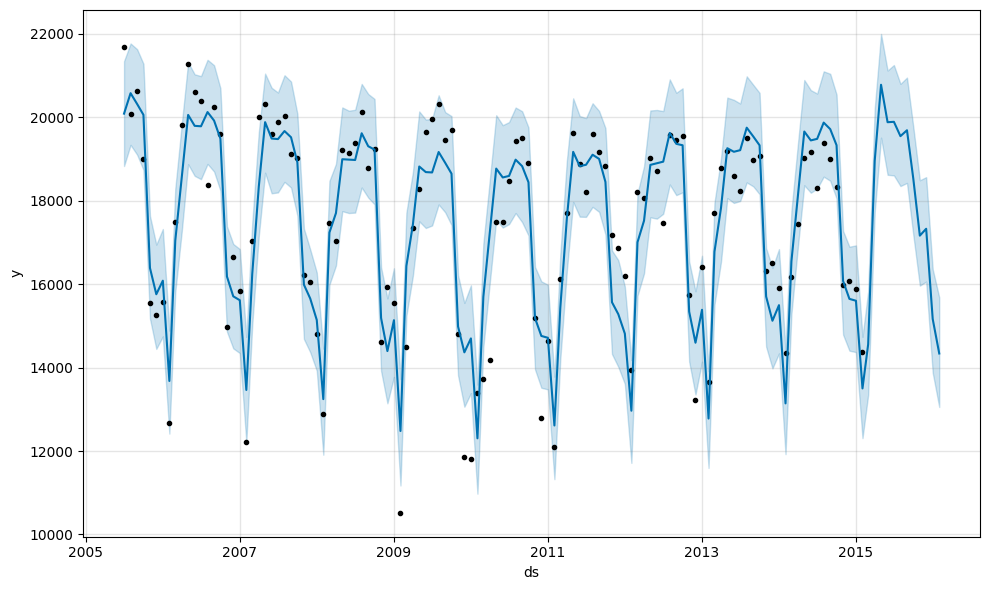

In [9]:
future = prophet.make_future_dataframe(periods=12, freq='M')
forecast = prophet.predict(future)

fig = prophet.plot(forecast, uncertainty=True)
plt.show()